# 1-3. Python과 Matplotlib

## 1. 왜 Matplotlib일까?

- `Matplotlib`은 Python에서 사용할 수 있는 시각화 라이브러리.
- 현재 사용되고 있는 다양한 데이터 분석 및 머신러닝/딥러닝은 Python에서 이뤄지고 있다. 
- `numpy`와 `scipy`를 베이스로 하여 다양한 라이브러리와 호환성이 좋다. 
    - `Scikit-Learn`, `PyTorch`, `Tensorflow`
    - `Pandas`
- 다양한 시각화 방법론을 제공한다.
    - 막대그래프 
    - 선그래프
    - 산점도
    - ETC
    
- 그 외에도 `Seaborn`, `Plotly`, `Bokeh`, `Altair` 등의 시각화 라이브러리가 존재
    - Matplotlib가 범용성이 제일 넓고, base가 되는 라이브러리

### 1-1. Import Library

`matplotlib`은 줄여서 `mpl`로 코드 상에서 사용합니다.

In [1]:
import numpy as np 
import matplotlib as mpl

print(f'numpy version : {np.__version__}') # version check
print(f'matplotlib version : {mpl.__version__}') # version check

numpy version : 1.19.5
matplotlib version : 3.3.4


만약 버전이 다르다면 `pip install matplotlib` 또는 `conda install matplotlib`으로 라이브러리를 다운받으시면 됩니다.

그리고 가장 많이 사용하는 `pyplot` 모듈도 함께 불러옵니다. (이전에는 `pylab`이 있었지만 현재는 지원안함)

In [4]:
!pip install matplotlib==3.3.4

     |████████████████████████████████| 11.5 MB 11 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import matplotlib.pyplot as plt

## 2. 기본 Plot

### 2-1. Figure와 Axes

matplotlib에서 그리는 시각화는 Figure라는 큰 틀에 Ax라는 서브플롯을 추가해서 만든다.

In [3]:
fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

다만 Figure는 큰 틀이라 서브플롯을 최소 1개 이상 추가해야 하고, 추가하는 다양한 방법이 있습니다. 

> 3.차트의 요소/3.Facet에서 구체적으로 다룰 예정

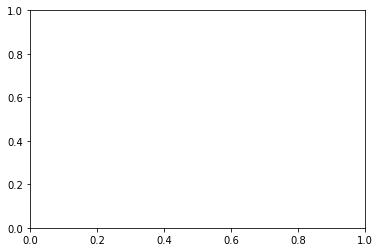

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

그래프의 사이즈는 figure의 사이즈로 서브플롯 ax의 사이즈를 조정합니다. 

가로, 세로 길이(inch 단위)를 tuple형태로 figsize 파라미터에 전달하여 조정합니다. 

노트북 환경에서는 비율로 생각하고 진행하면 편리합니다.

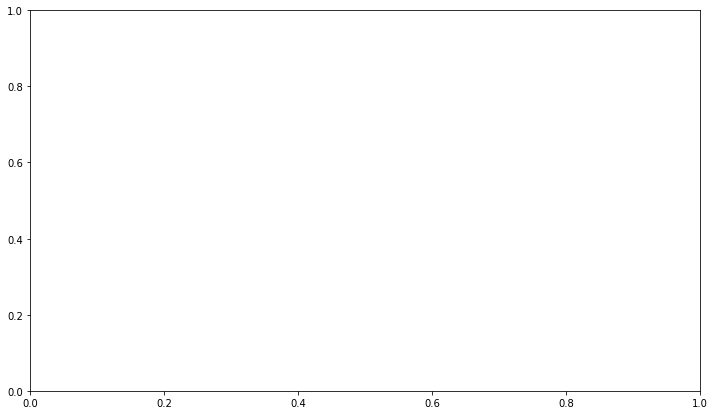

In [5]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()
plt.show()

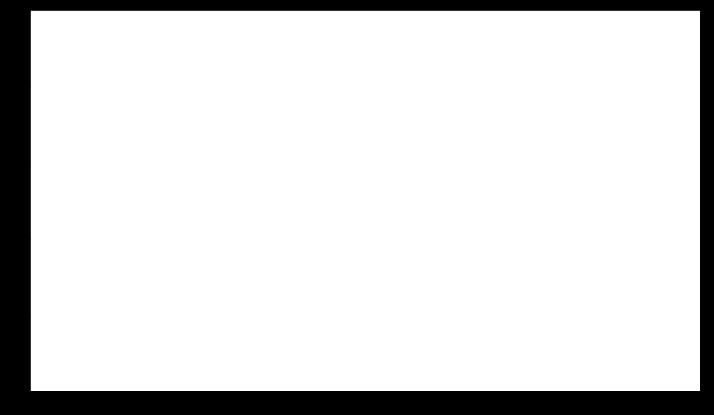

In [6]:
fig = plt.figure(figsize=(12, 7))
fig.set_facecolor('black')
ax = fig.add_subplot()
plt.show()

2개 이상 그리고 싶다면 위치를 지정해주어야 합니다.

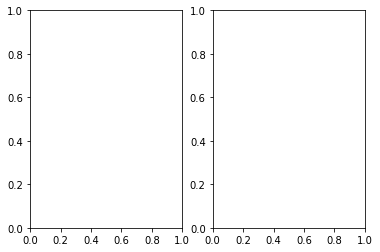

In [7]:
fig = plt.figure()
ax = fig.add_subplot(121) 
# ax = fig.add_subplot(1, 2, 1)로 사용가능
ax = fig.add_subplot(122) 
plt.show()

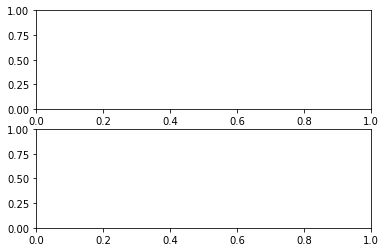

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(211) 
ax2 = fig.add_subplot(212) 
# 같은 내용이지만 더 가독성을 높인다면 
# 다음과 같이 사용 가능
# ax1 = fig.add_subplot(1, 2, 1)
# ax2 = fig.add_subplot(1, 2, 2)
plt.show()

### 2-2. plt로 그래프 그리기

리스트 `[1, 2, 3]` 데이터를 `ax`에 그린다면 어떻게 그릴 수 있을까요?

우선은 2장.기본차트에서 다루도록하고 선그래프를 그리는 `plot`을 그려보게습니다.

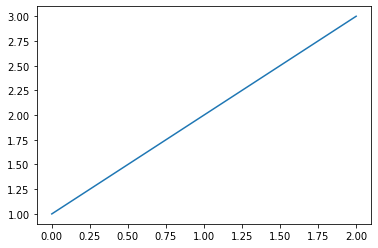

In [10]:
fig = plt.figure()
ax = fig.add_subplot()

x = np.array([1, 2, 3])

plt.plot(x)
plt.show()

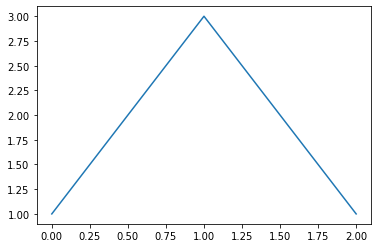

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

x = np.array([1, 3, 1])

plt.plot(x)
plt.show()

2개를 순서대로 그린다면 다음과 같이 그릴 수 있습니다.

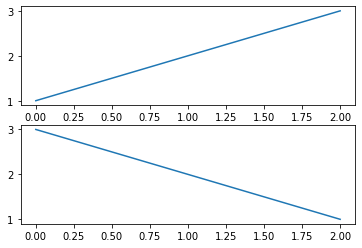

In [12]:
fig = plt.figure()

x1 = [1, 2, 3]
x2 = [3, 2, 1]

ax1 = fig.add_subplot(211) 
plt.plot(x1) # ax1에 그리기

ax2 = fig.add_subplot(212) 
plt.plot(x2) # ax2에 그리기
plt.show()

`plt`로 그리는 그래프들은 순차적으로 그리기에 좋습니다. 

하지만 프로그래밍 스타일에 따라 (보편적인 Python)에서는 꼭 순차적으로 그리지만은 않습니다.

좀 더 pythonic하게 구현을 하려면 어떻게 해야할까요?

### 2-3. 서브플롯 객체 ax에 그리기

`ax` 객체에 직접그리면 됩니다. 이렇게 Matplotlib은 그릴 때 두 가지 API를 따로 지원합니다.

- Pyplot API : 순차적 방법
- 객체지향(Object-Oriented) API : 그래프에서 각 객체에 대해 직접적으로 수정하는 방법

> 편한 커스텀을 위해 강의 및 자료에서는 가능한 객체지향 API를 사용합니다.

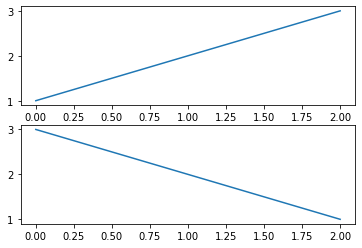

In [13]:
fig = plt.figure()

x1 = [1, 2, 3]
x2 = [3, 2, 1]

ax1 = fig.add_subplot(211) 
ax2 = fig.add_subplot(212) 

ax1.plot(x1) 
ax2.plot(x2)
plt.show()

> plt로 그리다 plt.gcf().get_axes()로 다시 서브플롯 객체를 받아서 사용할 수도 있음

## 3. Plot의 요소들 알아보기

### 3-1. 한 서브플롯에서 여러 개 그리기

ax에는 동시에 다양한 그래프를 그릴 수 있습니다.

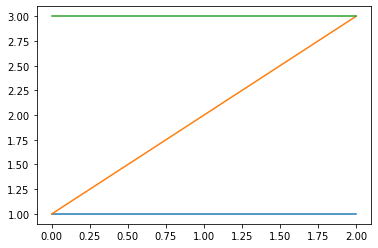

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111) 
# 3개의 그래프 동시에 그리기
ax.plot([1, 1, 1]) # 파랑
ax.plot([1, 2, 3]) # 주황
ax.plot([3, 3, 3]) # 초록

plt.show()

동시에 그래프를 그리게 되면 색상이 자동적으로 구분됩니다.

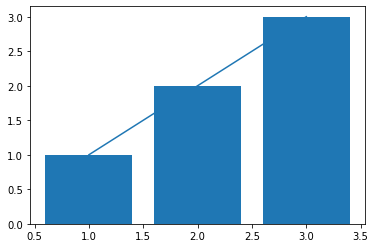

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111) 

# 선그래프와 막대그래프 동시에 그리기
ax.plot([1, 2, 3], [1, 2, 3]) 
ax.bar([1, 2, 3], [1, 2, 3]) 

plt.show()

다른 종류의 그래프가 추가된다면 다시 파란색으로 시작하기에 색을 명시해주는 게 좋습니다.

### 3-2. 색상 지정하기

색을 직접 명시할 수 있고, 일반적으로 `color` 파라미터를 통해 전달합니다.

color를 명시하는 3가지 방법은 코드를 통해 살펴봅시다.

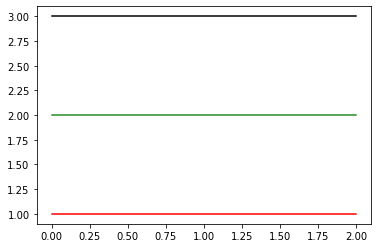

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111) 
# 3개의 그래프 동시에 그리기
ax.plot([1, 1, 1], color='r') # 한 글자로 정하는 색상
ax.plot([2, 2, 2], color='forestgreen') # color name
ax.plot([3, 3, 3], color='#000000') # hex code (BLACK)
plt.show()

> 색에 대한 다양한 조합은 직접하면 제일 좋겠지만 rgb hex값을 검색하는 방법을 추천!!

> 더 자세한 내용은 차트의 요소 - 2. color에서 

### 3-3. 텍스트 사용하기

정보를 추가하기 위해 텍스트를 사용할 수도 있습니다.

> 더 자세한 내용은 3.차트의 요소 > 1. Text에서 계속

우선 label을 봅시다.

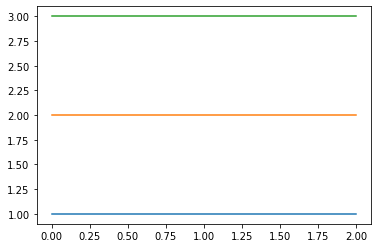

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot([1, 1, 1], label='1') 
ax.plot([2, 2, 2], label='2') 
ax.plot([3, 3, 3], label='3')
plt.show()

시각화에서 드러나지 않습니다. 범례(`legend`)를 추가해보겠습니다.

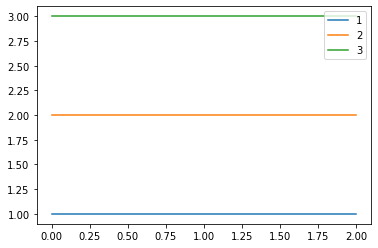

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot([1, 1, 1], label='1') 
ax.plot([2, 2, 2], label='2') 
ax.plot([3, 3, 3], label='3')
ax.legend()
plt.show()

범례를 추가하면 해당 그래프와 매칭되는 텍스트 정보가 추가됩니다.

여기서 제목(`title`)을 추가해보겠습니다.

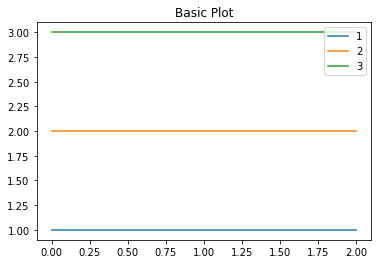

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot([1, 1, 1], label='1') 
ax.plot([2, 2, 2], label='2') 
ax.plot([3, 3, 3], label='3')
ax.set_title('Basic Plot')
ax.legend()
plt.show()

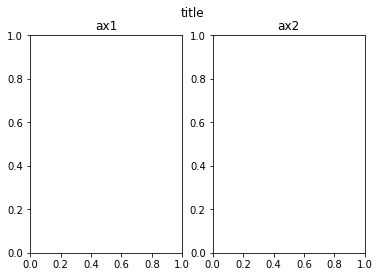

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title('ax1')
ax2.set_title('ax2')
fig.suptitle('fig') # super
plt.show()

ax에서 특정 데이터를 변경하는 경우 `.set_{}()` 형태의 메서드가 많습니다. 알아둡시다 :)

`set`으로 세팅하는 정보들은 반대로 해당 정보를 받아오는 경우에는 `.get_{}()` 형태의 메서드를 사용합니다.

Basic Plot


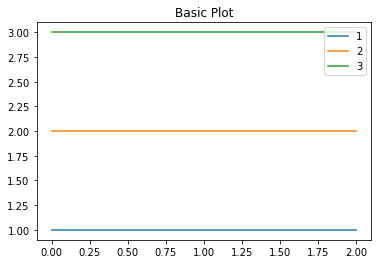

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot([1, 1, 1], label='1') 
ax.plot([2, 2, 2], label='2') 
ax.plot([3, 3, 3], label='3')
ax.set_title('Basic Plot')
ax.legend()

print(ax.get_title())
plt.show()

축은 `ticks`와 `ticklabels`로 구분됩니다.

`ticks`은 축에 적히는 수 위치를 지정합니다.

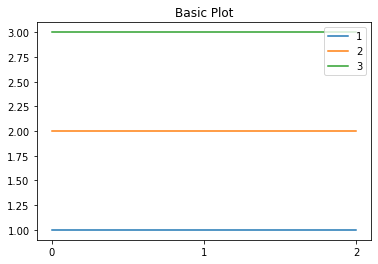

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot([1, 1, 1], label='1') 
ax.plot([2, 2, 2], label='2') 
ax.plot([3, 3, 3], label='3')


ax.set_title('Basic Plot')
ax.set_xticks([0, 1, 2])


ax.legend()

plt.show()

`ticklabels`은 축에 적히는 텍스트를 수정합니다.

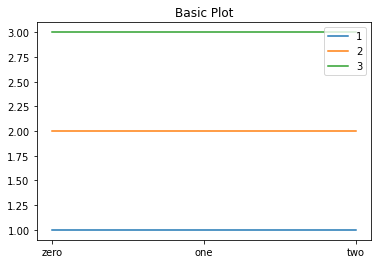

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot([1, 1, 1], label='1') 
ax.plot([2, 2, 2], label='2') 
ax.plot([3, 3, 3], label='3')


ax.set_title('Basic Plot')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['zero', 'one', 'two'])
ax.legend()

plt.show()

마지막으로는 일반적인 텍스트를 추가하는 2가지가 있습니다.

- `ax.text()` : 원하는 위치에 텍스트를 적어 줌

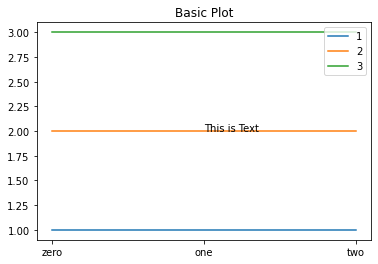

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot([1, 1, 1], label='1') 
ax.plot([2, 2, 2], label='2') 
ax.plot([3, 3, 3], label='3')


ax.set_title('Basic Plot')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['zero', 'one', 'two'])

ax.text(x=1, y=2, s='This is Text') # 

ax.legend()

plt.show()

- `ax.annotate()` : 원하는 위치에 텍스트를 지정하고 포인트를 지정

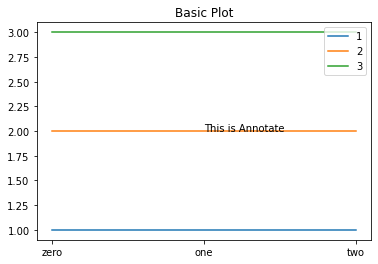

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot([1, 1, 1], label='1') 
ax.plot([2, 2, 2], label='2') 
ax.plot([3, 3, 3], label='3')


ax.set_title('Basic Plot')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['zero', 'one', 'two'])

ax.annotate(text='This is Annotate', xy=(1, 2)) # 

ax.legend()

plt.show()

annotate는 화살표 등을 추가할 수 있다는 장점이 있습니다. (세세한 세팅은 추후에 알아보겠습니다.)

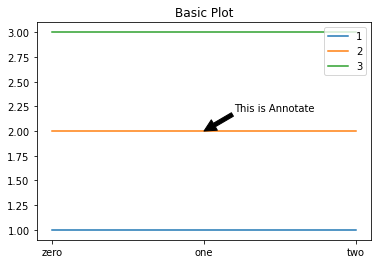

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.plot([1, 1, 1], label='1') 
ax.plot([2, 2, 2], label='2') 
ax.plot([3, 3, 3], label='3')


ax.set_title('Basic Plot')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['zero', 'one', 'two'])

ax.annotate(text='This is Annotate', xy=(1, 2),
           xytext=(1.2, 2.2), 
            arrowprops=dict(facecolor='black'),
           )

ax.legend()

plt.show()